<a href="https://colab.research.google.com/github/lin-k23/RISCA/blob/main/sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RISCA

## Dependencies

In [1]:
!git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
%cd SAR_ADC/script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx
from util.display_dataframe import display_dataframe
from util.select import select

Cloning into 'SAR_ADC'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (280/280), done.
remote: Total 442 (delta 261), reused 340 (delta 159), pack-reused 0 (from 0)
Receiving objects: 100% (442/442), 2.73 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (261/261), done.
/content/SAR_ADC/script


## Set Parameters

In [2]:
mdl = preset_mdl()
pr = preset_pr()
Mode='Single-Channel SAR' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024

## Run Simulator

Loading file: ../config/sar/timing_table.xlsx
[util.load_assembler_xlsx] parameter TI loaded: pr[TI]= 1
[util.load_assembler_xlsx] parameter f_in_center1 loaded: pr[f_in_center1]= 270000000


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB


FileNotFoundError: [Errno 2] No such file or directory: '/content/SAR_ADC/script/..\\pic\\nssar1o1c.png'

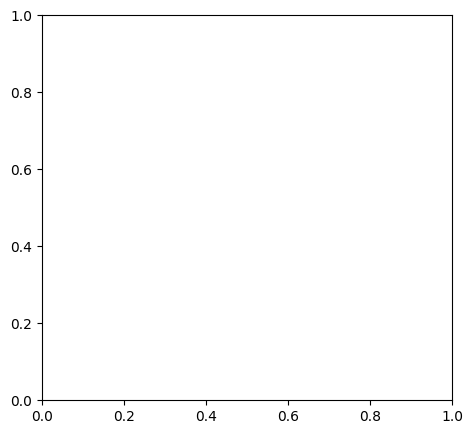

In [6]:
# @title Run Simulator
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))

# update pr with pr_loaded
pr.update(pr_loaded)
# if "T_assembler" in pr:
#     print("Loaded successfully!\n")
cfg_info = pd.DataFrame(pr["T_assembler"])
# cfg_infon=pd.DataFrame(pr["cfg_table"])
display_dataframe(cfg_info,pr["conf_name"])

# Convertion begins
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
# Analyse the result
test = Analyser(da, pr, mdl)
test.mode_analyser()